<a href="https://colab.research.google.com/github/aymuos/masters-practise-repo/blob/main/TERM2/ML_Lab/Assignment/Assignment6/problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install fastparquet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 54.3 MB/s eta 0:00:00


In [25]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_parquet('./assignment6_data.parquet')


In [4]:
df.head()

,Published_Sample_Name,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,RP5-890E16.5,RP11-122L4.2,LINC00624,RP5-1116H23.4,RP5-1099C19.2,RP3-405J10.5,MRPL45,RP11-327I22.5,SubGroup,BA
0,20131219_1C01,11.667,0.0,2.083,0.208,0.417,0.000,0.0,0.0,508.138000,...,0.000,0.000,0.833,0.0,0.625,0.625,1.042,0.0,Ex1,BA8
1,20131219_1C07,0.000,0.0,2.228,27.541,5.468,0.000,0.0,0.0,6.480000,...,0.810,0.000,0.608,0.0,0.608,0.000,8.505,0.0,Ex3,BA8
2,20131219_1C09,0.000,0.0,69.514,0.000,1.209,0.000,0.0,0.0,7.254000,...,1.813,1.511,0.907,0.0,0.000,0.000,4.533,0.0,Ex4,BA8
3,20131219_1C13,0.000,0.0,3.956,1.130,0.424,0.141,0.0,0.0,114.302002,...,0.565,0.141,0.141,0.0,0.000,0.000,1.554,0.0,Ex1,BA8
4,20131219_1C30,0.000,0.0,3.170,0.059,10.155,0.117,0.0,0.0,2.113000,...,0.000,0.000,1.702,0.0,0.176,0.000,0.470,0.0,Ex3,BA8


In [5]:
df.columns.value_counts()

,count
BA,1
Published_Sample_Name,1
RP11-706P11.2,1
RP11-694O4.1,1
RP11-227G15.11,1
...,...
FGR,1
C1orf112,1
SCYL3,1
DPM1,1


In [ ]:
df.isnull().sum()

Published_Sample_Name    0
TSPAN6                   0
TNMD                     0
DPM1                     0
SCYL3                    0
                        ..
RP3-405J10.5             0
MRPL45                   0
RP11-327I22.5            0
SubGroup                 0
BA                       0
Length: 25010, dtype: int64

In [ ]:
# for cols in df.columns:
#     print(df[cols].unique())

In [6]:
categorical_columns = df.select_dtypes(include='object').columns

if len(categorical_columns) > 0:
    print("Categorical columns present:", list(categorical_columns))
else:
    print("No categorical columns found.")

Categorical columns present: ['Published_Sample_Name', 'SubGroup', 'BA']


In [9]:
df=df.drop(["Published_Sample_Name"],axis=1)

In [15]:
variances = df.select_dtypes(include='number').var()
sorted_variances_list = variances.sort_values(ascending=False)
# print(sorted_variances_list)

In [17]:
count_df_to_remove = math.ceil(0.1 * len(df.columns))
print(count_df_to_remove, len(df.columns) , len(df.columns)-count_df_to_remove)


2501 25009 22508


In [16]:
genes_to_remove = sorted_variances_list.head(count_df_to_remove).index

# Remove the genes with the lowest variance
filtered_df = df.drop(columns=genes_to_remove)

print(filtered_df.head())

   TSPAN6  TNMD    DPM1   SCYL3  C1orf112    FGR  CFH  FUCA2        GCLC  \
0  11.667   0.0   2.083   0.208     0.417  0.000  0.0    0.0  508.138000   
1   0.000   0.0   2.228  27.541     5.468  0.000  0.0    0.0    6.480000   
2   0.000   0.0  69.514   0.000     1.209  0.000  0.0    0.0    7.254000   
3   0.000   0.0   3.956   1.130     0.424  0.141  0.0    0.0  114.302002   
4   0.000   0.0   3.170   0.059    10.155  0.117  0.0    0.0    2.113000   

    NFYA  ...  RP5-890E16.5  RP11-122L4.2  LINC00624  RP5-1116H23.4  \
0  0.000  ...         0.000         0.000      0.833            0.0   
1  0.000  ...         0.810         0.000      0.608            0.0   
2  0.302  ...         1.813         1.511      0.907            0.0   
3  0.141  ...         0.565         0.141      0.141            0.0   
4  0.000  ...         0.000         0.000      1.702            0.0   

   RP5-1099C19.2  RP3-405J10.5  MRPL45  RP11-327I22.5  SubGroup   BA  
0          0.625         0.625   1.042       

pre-processing

In [19]:
filtered_df.describe()

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,RP11-325L12.7,RP11-147L13.14,RP5-890E16.5,RP11-122L4.2,LINC00624,RP5-1116H23.4,RP5-1099C19.2,RP3-405J10.5,MRPL45,RP11-327I22.5
count,3042.000000,3042.000000,3042.00000,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,...,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000
mean,0.822299,0.154737,19.21839,9.019205,9.848455,0.151812,0.530995,1.238517,32.573555,2.503603,...,0.197894,0.675341,1.067618,0.071310,5.526154,0.124446,1.398045,1.065452,10.010563,0.215554
std,11.014392,2.870166,101.46994,41.409733,32.529816,1.704445,4.072570,31.444502,93.836884,23.007692,...,4.640892,15.037995,25.830683,0.763088,43.687672,2.469603,6.071043,16.176039,43.714279,4.470715
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.433250,0.000000,0.000000,0.000000,4.809000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.456000,0.000000,0.000000,0.000000,0.944000,0.000000
50%,0.000000,0.000000,0.62700,0.470000,1.309000,0.000000,0.000000,0.000000,8.534500,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.157000,0.000000,0.612500,0.000000,1.936500,0.000000
75%,0.000000,0.000000,6.67400,3.229250,4.354000,0.000000,0.334750,0.000000,21.801751,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.486000,0.000000,1.290000,0.000000,4.395000,0.000000
max,397.182007,108.210999,3540.61499,1170.454956,506.540009,77.455002,138.376999,1676.118042,1828.845947,728.849976,...,191.240997,713.752014,1197.171021,30.908001,1852.269043,99.593002,225.686996,757.687012,1215.561035,156.828995


# clearly there is imbalance in data scaling

In [20]:
# Define features (X) and target (y)
X = filtered_df.drop(columns=['BA', 'SubGroup'])  # Features: all columns except BA and SubGroup
y = filtered_df['SubGroup']  # Target: SubGroup column
z = filtered_df['BA']  # Target: BA column

In [24]:
data = X
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [26]:
# Apply PCA
pca = PCA(n_components=100)
pca.fit(scaled_data)

PCA()

In [27]:
# Transform the data
pca_outdata = pca.transform(scaled_data)

# Step 4: Analyze variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Variance captured by the top 100 components
variance_top_100 = cumulative_variance[99]  # Index 99 corresponds to the 100th component
print(f"Variance captured by the top 100 components: {variance_top_100:.2f}")

Variance captured by the top 100 components: 0.10


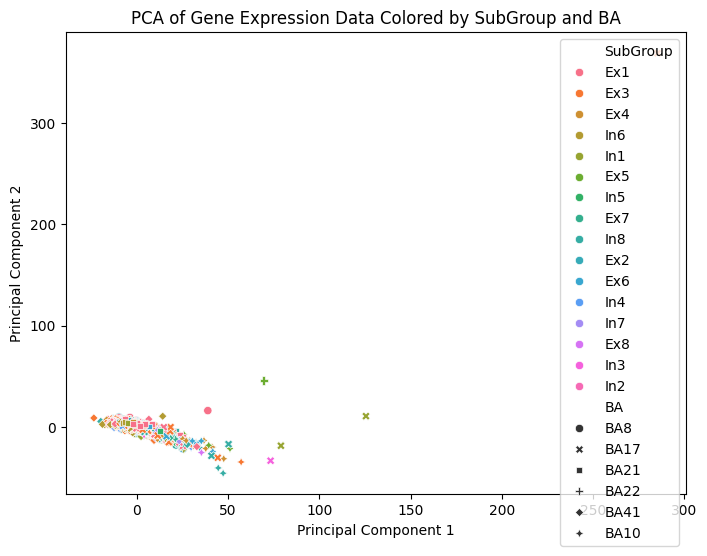

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_outdata[:, 0], y=pca_outdata[:, 1], hue=y, style=z)
plt.title('PCA of Gene Expression Data Colored by SubGroup and BA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
